In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df=pd.read_csv("bhp (1).csv")

In [61]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [62]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [63]:
min_val,max_val=df['price_per_sqft'].quantile([0.001,0.999])

In [64]:
min_val,max_val

(1366.184, 50959.36200000098)

In [65]:
df.shape

(13200, 7)

In [86]:
df2=df[(df['price_per_sqft']>min_val) & (df['price_per_sqft']<max_val)]
df2.shape

(13172, 8)

In [67]:
# 4 standard deviation
lower_limit=df2.price_per_sqft.mean()-4*df2.price_per_sqft.std()
upper_limit=df2.price_per_sqft.mean()+4*df2.price_per_sqft.std()

In [90]:
lower_limit,upper_limit
df2.shape

(13172, 8)

In [92]:
df3=df2[(df['price_per_sqft']>lower_limit) & (df['price_per_sqft']<upper_limit)]
df3.shape

C:\Users\hp\AppData\Local\Temp\ipykernel_10352\446071483.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[(df['price_per_sqft']>lower_limit) & (df['price_per_sqft']<upper_limit)]


(13047, 8)

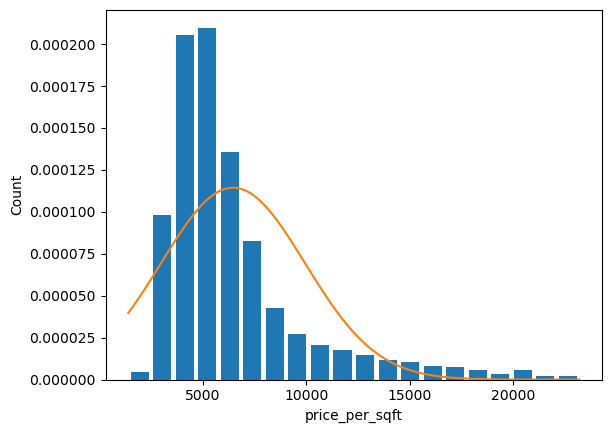

In [93]:
from scipy.stats import norm
import numpy as np
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

rng = np.arange(df3.price_per_sqft.min(), df3.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [94]:
df2.shape

(13172, 8)

In [101]:
df2['Zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()

C:\Users\hp\AppData\Local\Temp\ipykernel_10352\2320529005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


In [102]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [104]:
df2[df2['Zscore']<-4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore


In [103]:
df2[df2['Zscore']>4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [105]:
df2[(df2['Zscore']>-4) & (df2['Zscore']<4)].shape

(13047, 8)